In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [3]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
Univ1 = Univ.iloc[:,1:]

In [5]:
Univ.columns

Index(['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [6]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = pd.DataFrame(scaler.fit_transform(Univ.iloc[:,1:]),columns = ['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'] )
scaled_Univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [7]:
scaled_Univ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAT       25 non-null     float64
 1   Top10     25 non-null     float64
 2   Accept    25 non-null     float64
 3   SFRatio   25 non-null     float64
 4   Expenses  25 non-null     float64
 5   GradRate  25 non-null     float64
dtypes: float64(6)
memory usage: 1.3 KB


In [7]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

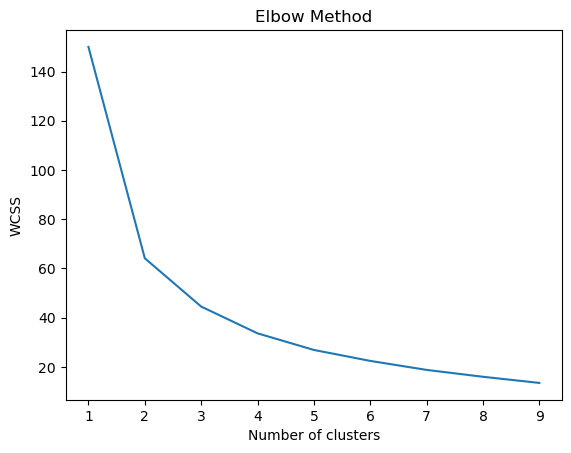

In [8]:
wcss = []
for i in range(1, 10):
    
    kmeans = KMeans(n_clusters=i,random_state=42 )
    kmeans.fit(scaled_Univ_df)
    #kmeans.fit(Univ1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=5, random_state=42)

In [10]:
clusters_new.labels_

array([2, 3, 4, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 4, 4, 4, 2,
       2, 1, 0])

In [11]:
clusters_new.labels_

array([2, 3, 4, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 4, 4, 4, 2,
       2, 1, 0])

In [12]:
set(clusters_new.labels_)

{0, 1, 2, 3, 4}

In [13]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [14]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [15]:
Univ.sort_values(by = "clusterid_new")

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
24,Yale,1375,95,19,11,43514,96,0
16,Stanford,1360,90,20,12,36450,93,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
8,Harvard,1400,91,14,11,39525,97,0
14,Princeton,1375,91,14,8,30220,95,0
10,MIT,1380,94,30,10,34870,91,0
17,TexasA&M,1075,49,67,25,8704,67,1
15,Purdue,1005,28,90,19,9066,69,1
13,PennState,1081,38,54,18,10185,80,1


In [16]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.91486304,  0.78506207, -0.9194305 , -0.53914138,  0.57219913,
         0.88469061],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [ 0.05707802,  0.21768517, -0.32076595, -0.08657091, -0.34337002,
         0.49635071],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ],
       [-0.22548645, -0.1171141 ,  0.77863347,  0.25845807, -0.27480922,
        -0.70086298]])

In [17]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2,1272.500000,80.625000,33.000000,12.375000,22535.000000,91.125000
3,3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,4,1242.500000,74.250000,54.250000,13.750000,23504.000000,80.500000


In [18]:
Univ[Univ['clusterid_new']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [19]:
Univ[Univ['clusterid_new']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
7,Georgetown,1255,74,24,12,20126,92,2
11,Northwestern,1260,85,39,11,28052,89,2
12,NotreDame,1255,81,42,13,15122,94,2
21,UPenn,1285,80,36,11,27553,90,2
22,UVA,1225,77,44,14,13349,92,2


In [20]:
# Quality of clusters is expressed in terms of Silhoutte score

from sklearn.metrics import silhouette_score
score =silhouette_score(scaled_Univ_df, kmeans.labels_ , metric='euclidean')
score

0.20397246978202344